In [2]:
# imports
import matplotlib.pyplot as plt 
import scipy
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime 
import netCDF4
import xarray as xr
from scipy.stats import binned_statistic, binned_statistic_2d, binned_statistic_dd

# process mms datafiles
import glob
import sys

# append a new directory to sys.path
# sys.path.append('../imef/data/')

# import download_data as ddat

import data_prep as dpp

In [2]:
import glob
import spacepy as spy
from spacepy import pycdf

aspoc_folder = "mms-data/aspoc_data_mms1_srvy_l2_2017/"
example = "mms1_aspoc_srvy_l2_20170102_v2.0.3.cdf"
cdf = pycdf.CDF(aspoc_folder + example)
print(cdf)

aspoc_dat = spy.pycdf.concatCDF(
    [spy.pycdf.CDF(f) for f in glob.glob(aspoc_folder + "*.cdf")]
)

ModuleNotFoundError: No module named 'spacepy'

In [ ]:
#aspoc_dat

d = {"time": aspoc_dat["Epoch"], "ionic": aspoc_dat["mms1_aspoc_ionc"], "asp1_en": aspoc_dat["mms1_asp1_energy"]}
df_pot = pd.DataFrame(data=d)
df_pot = df_pot.sort_values(by=["time"])

NameError: name 'aspoc_dat' is not defined

In [ ]:
# plt.plot(df_pot["time"], df_pot["ionic"])


In [ ]:
# locate data
data_floc = 'mms-data' # directory for data file location
data_fname_2015_2019 = 'mms1_imef_srvy_l2_5sec_20150901000000_20190101000000' # file name
dfile = data_floc+'/'+data_fname_2015_2019+'.nc' # complete path to file

# read dataset
dat = xr.open_dataset(dfile)



In [3]:
# locate data
data_floc = 'mms-data' # directory for data file location
data_fname_mms1_2015_2019 = 'mms1_imef_srvy_l2_5sec_20150901000000_20190101000000' # file name; mms1 from 2015 to 2019
data_fname_mms1_2019_2022 = 'mms1_imef_srvy_l2_5sec_20190101000000_20220901000000' # file name; mms1 from 2019 to 2022
data_fname_mms2_2015_2019= 'mms2_imef_srvy_l2_5sec_20150901000000_20190101000000' # file name; mms2 from 2015 to 2019
data_fname_mms2_2019_2022 = 'mms2_imef_srvy_l2_5sec_20190101000000_20220901000000' # file name; mms2 from 2019 to 2022

dfile_mms1_2015_2019 = data_floc+'/'+data_fname_mms1_2015_2019+'.nc' # complete path to file
dfile_mms2_2015_2019 = data_floc+'/'+data_fname_mms1_2015_2019+'.nc' # complete path to file
dfile_mms1_2019_2022 = data_floc+'/'+data_fname_mms1_2019_2022+'.nc' # complete path to file
dfile_mms2_2019_2022 = data_floc+'/'+data_fname_mms1_2019_2022+'.nc' # complete path to file

# read datasets
dat_mms1_2015_2019 = xr.open_dataset(dfile_mms1_2015_2019)
dat_mms2_2015_2019 = xr.open_dataset(dfile_mms2_2015_2019)
dat_mms1_2019_2022 = xr.open_dataset(dfile_mms1_2019_2022)
dat_mms2_2019_2022 = xr.open_dataset(dfile_mms2_2019_2022)

# combine datasets for 2015-2022
# (A/N): work in progress
# xr.merge([dat_mms1_2015_2019, dat_mms1_2019_2022], compat="override")

In [13]:
# a= len(dat_mms1_2015_2019['E_EDI'].loc[:,'x'].values)
# b= len(dat_mms1_2019_2022['E_EDI'].loc[:,'x'].values)
# a,b,a+b


a = dat_mms1_2019_2022['E_EDI'].size
b = dat_mms1_2015_2019['E_EDI'].size
a,b,a+b

(69413760, 63141120, 132554880)

In [ ]:
# example values: mms1 from 2015 to 2019
df = dat_mms1_2015_2019

# get time 
t = df['time'].values # pull values
t0 = pd.to_datetime(t[0]).strftime('%m/%d/%Y') # get start date in short format
tf = pd.to_datetime(t[-1]).strftime('%m/%d/%Y') # get end date in short format

# time check
print(f" data start: {t0}, data end: {tf}")


# pull EF from diff. MMS instruments
edp = df['E_EDP'][:,:,0].drop(['cart',]).rename({'E_index': 'cart'}).assign_coords({'cart': ['x', 'y', 'z']}) # (A/N): correct units
edi = df['E_EDI']
dis = df['E_DIS']
des = df['E_DES']


 data start: 09/01/2015, data end: 12/31/2018


In [ ]:
# l_coord = df["L"].values
# mlt_coord = df["MLT"].values


# def plot_efield_polar(ax, edat, l, mlt):
#     instr_name = str(edat.name[-3:7])  # instrument name
#     instr_ltX = "$E_{" + instr_name + "}$"  # name in LaTex formatting

#     # pull data
#     ex = edat.loc[:, "x"].values  # Ex
#     ey = edat.loc[:, "y"].values  # Ey
#     ez = edat.loc[:, "z"].values  # Ez

#     # remove outlying/bad values
#     for arr in [ex, ey, ez]:
#         arr[abs(arr) >= 1000] = np.nan

#     # plot E-field over time
#     # ax.plot(t, ex, c="r", linewidth=1, label="$E_x$")
#     ax.set_thetagrids(
#         np.linspace(0, 360, 9), labels=["0", "3", "6", "9", "12", "15", "18", "21", " "]
#     )
#     # ax.pcolormesh(l, mlt, ex, cmap='hsv')
#     ax.scatter(mlt, l, c=ex, cmap="Blues", alpha=0.5)
#     # ax.contourf(mlt, l, ex, cmap="hsv")
#     # ax.pcolormesh(mlt, l, ex)

#     # ax.plot(t, ey, c="g", linewidth=1, label="$E_y$")
#     # ax.plot(t, ez, c="b", linewidth=1, label="$E_z$")
#     # ax.set_ylabel(f"{instr_ltX} [mV/m]")

#     # x-axis tick label rotation to fit length of dates
#     # ax.set_xticks(ax.get_xticks())
#     # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#     # plot legend
#     # ax.legend(bbox_to_anchor=(1, 1))


# ax = plt.subplot(111, polar=True)
# ax.set_yticklabels([])
# plot_efield_polar(ax, dis, l_coord, mlt_coord)
# #plot_efield_polar(ax, edi, l_coord, mlt_coord)


# # # EXAMPLE: run f

In [ ]:
# kp = df["Kp"].values
# scpot = df["Scpot"].values

# for val in [kp]:
#     val[abs(val) >= 1000] = np.nan

# for val in [scpot]:
#     val[abs(val) >= 1000] = np.nan

/var/folders/8l/y30_j6_97qj5rc4x992936vr0000gp/T/ipykernel_1425/147347704.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha='right')


[Text(16679.0, 0, '2015-09'),
 Text(16801.0, 0, '2016-01'),
 Text(16922.0, 0, '2016-05'),
 Text(17045.0, 0, '2016-09'),
 Text(17167.0, 0, '2017-01'),
 Text(17287.0, 0, '2017-05'),
 Text(17410.0, 0, '2017-09'),
 Text(17532.0, 0, '2018-01'),
 Text(17652.0, 0, '2018-05'),
 Text(17775.0, 0, '2018-09'),
 Text(17897.0, 0, '2019-01')]

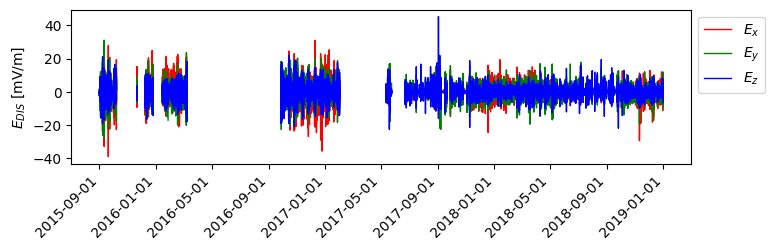

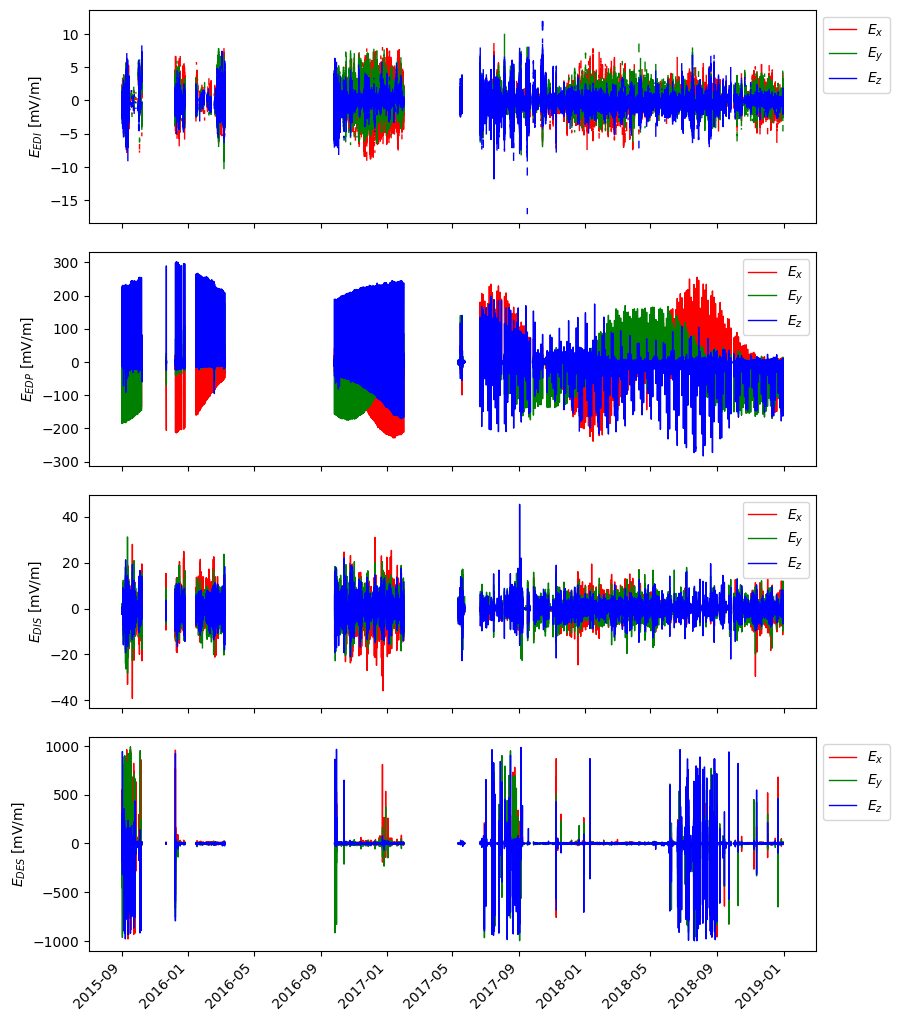

In [ ]:

def plot_efield_overview(ax, edat, t):
    
    instr_name = str(edat.name[-3:7])   # instrument name
    instr_ltX = "$E_{"+instr_name+"}$"  # name in LaTex formatting
    
    # pull data
    ex = edat.loc[:,'x'].values # Ex
    ey = edat.loc[:,'y'].values # Ey
    ez = edat.loc[:,'z'].values # Ez
    
    # remove outlying/bad values
    for arr in [ex,ey,ez]:
        arr[abs(arr) >= 1000] = np.nan
    
    # plot E-field over time
    ax.plot(t,ex, c='r', linewidth=1, label='$E_x$')
    ax.plot(t,ey, c='g', linewidth=1, label='$E_y$')
    ax.plot(t,ez, c='b', linewidth=1, label='$E_z$')
    ax.set_ylabel(f"{instr_ltX} [mV/m]")
    
    # x-axis tick label rotation to fit length of dates
    # ax.set_xticks(ax.get_xticks())
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # plot legend
    ax.legend(bbox_to_anchor=(1, 1))
        

# # EXAMPLE: run for DIS instrument

# # example: overview plot for DIS intrument
# fig, ax = plt.subplots(1, figsize=(8, 2))
# plot_efield_overview(ax,dis,t)
# # x-axis tick label rotation to fit length of dates
# ax.set_xticks(ax.get_xticks().tolist())
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# # EXAMPLE: Overview plot for all MMS instruments
# # (A/N) runs a bit slow!

# fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
# fig.tight_layout()
# # fig.suptitle(f'Overview of {sdate} Storm')
# plot_efield_overview(ax[0],edi,t)
# plot_efield_overview(ax[1],edp,t)
# plot_efield_overview(ax[2],dis,t)
# plot_efield_overview(ax[3],des,t)

# # x-axis tick label rotation to fit length of dates
# # ax[3].set_xticks(ax[3].get_xticks().tolist())
# ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha='right')
    

In [ ]:
myck=dpp.dat_mms1['time'].dims
myck[0]

'time'

In [ ]:
't'.upper()

'T'

In [ ]:
cc = True if 'cart' in myck else False
cc

True

In [ ]:
def ma(*args):
    print(args[0])
ma('st','ree','t')

st


In [ ]:

def plot_efield_comp(axs, ef1, ef2, c='k', hex=False, **kwargs):
    
    instr1 = "$E_{"+str(ef1.name[-3:7])+"}$" # instrument 1 name
    instr2 = "$E_{"+str(ef2.name[-3:7])+"}$" # instrument 2 name
    
    # get coordinates
    ef1_coord = [ef1.loc[:,'x'].values, ef1.loc[:,'y'].values, ef1.loc[:,'z'].values]
    ef2_coord = [ef2.loc[:,'x'].values, ef2.loc[:,'y'].values, ef2.loc[:,'z'].values]
    coord = ['x','y','z']
    
    # remove outliers
    for arr in ef1_coord:
        arr[abs(arr) >= 1000] = np.nan
        
    for arr in ef2_coord:
        arr[abs(arr) >= 1000] = np.nan
        
    # scatter plot: efield comparison
    for i in range(0,3):
        if hex == True:
            axs[i].hexbin(ef1_coord[i], ef2_coord[i], gridsize=(150, 150), bins="log")
        else:
            axs[i].scatter(ef1_coord[i], ef2_coord[i], marker='x',color=c,linewidths=0.5, **kwargs)
        
        # polyfit line
        idx = np.isfinite(ef1_coord[i]) & np.isfinite(ef2_coord[i]) # polyfit only works without nans in data; filter where values are finite
        z = np.polyfit(ef1_coord[i][idx], ef2_coord[i][idx], 1)
        p = np.poly1d(z)
        z = axs[i].plot(ef1_coord[i][idx], p(ef1_coord[i][idx]), "r--")

    # # identity line
    # for ax in axs:
    #     ax.plot([0,1],[0,1], color='r', linewidth=1, alpha=1, transform=ax.transAxes)
        
        # axs[0].fill_between(means.ix[:,0], means.ix[:,1]-stds.ix[:,0], means.ix[:,1]+stds.ix[:,0])
        # ax.plot([0,1],[0,1]- np.std([0,1]), color='r', linewidth=1, alpha=1, transform=ax.transAxes)
    
    # enforce square-shaped plots
    for ax in axs:
        ax.set_box_aspect(1)

        # ax.set_xlabel(f"{instr1}$_{{,{coord[i]}}}$ [mV/m]")
        # ax.set_ylabel(f"{instr2}$_{{,{coord[i]}}}$ [mV/m]")

    for i in range(0,3):
        # plot attributes / labels
        axs[i].set_xlabel(f"{instr1}$_{{,{coord[i]}}}$ [mV/m]")
        axs[i].set_ylabel(f"{instr2}$_{{,{coord[i]}}}$ [mV/m]")


    # generate caption
    t = ef1['time'].values
    t0 = pd.to_datetime(t[0]).strftime('%m/%d/%Y')
    tf = pd.to_datetime(t[-1]).strftime('%m/%d/%Y')
    print(f"Comparison of electric field values for the {ef1.name[-3:7]} and {ef2.name[-3:7]} MMS instruments from {t0} to {tf}. E-field values in units [mV/m]." )
    if hex==True:
        print("Plotted datapoints are grouped by hexagonal bins, or “hexbins,” such that each hexbin denotes the log number of points, log(N), in it.")



# EXAMPLE: instrument E-field comparison
fig, axs = plt.subplots(1,3, figsize=(10,10))
myplt = plot_efield_comp(axs, edi, dis, hex=True)

# show irregularilty
width = 2.5
for ax in axs:
    c_shade = 'g'
    ax.axvline(x=width, color=c_shade, linestyle='--', linewidth=0.75)
    ax.axvline(x=-width, color=c_shade, linestyle='--', linewidth=0.75)
    ax.axvspan(-width, width, alpha=0.25, color=c_shade)

fig.tight_layout()

# include when hex=True for colorbar
fig.colorbar(myplt, ax=axs, label="log($N$)", fraction=0.0135, pad=0.04) 

plt.savefig("disz.png", format="png", dpi=400) 

NameError: name 'plt' is not defined

In [ ]:
# observing outliers; pull specific coordinates
ef_coord = 'z' # specified coordinate
edi_coord = edi.loc[:,ef_coord].values
edp_coord = edp.loc[:,ef_coord].values
dis_coord = dis.loc[:,ef_coord].values

# remove outlying values
for arr in [edi_coord, edp_coord]:
    arr[abs(arr) >= 1000] = np.nan

# create datafrane (df) for E-Field coordinate    
newdat = {'EDI_'+ef_coord: edi_coord, 'EDP_'+ef_coord: edp_coord, 'time': t}
df_coord = pd.DataFrame(data=newdat)
df_coord.head(5) # check

In [ ]:
# filter dataframe to be only +/- width value in [mV/m] of EDI
# (this is where EDP outliers are)
width = 2.5
filtr_dist =  df_coord[(df_coord['EDI_'+ef_coord] <= 2) & (df_coord['EDI_'+ef_coord] >= -2) & df_coord['EDI_'+ef_coord].notna()]

# # check
# print(filtr_dist.quantile([0.25,0.5,0.75]))
# # filtr_dist

In [ ]:
print(filtr_dist.quantile([0.25,0.5,0.75, 0.85]))
qlim = 0.116613

# calculate IQR
q_upper = 0.98 # x,y,z = [?,?,0.98]
q_lower = 0.02 # x,y,z = [?,?,0.02]
Q1 = filtr_dist['EDP_'+ef_coord].quantile(q_lower)
Q3 = filtr_dist['EDP_'+ef_coord].quantile(q_upper)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outs = filtr_dist[(filtr_dist['EDP_'+ef_coord] < Q1 - threshold * IQR) | (filtr_dist['EDP_'+ef_coord] > Q3 + threshold * IQR)]

# outs =  filtr_dist[(filtr_dist['EDP_z'] <= qlim) & (filtr_dist['EDP_z'] >= -1*qlim)]
plt.scatter(df_coord['EDI_'+ef_coord], df_coord['EDP_'+ef_coord])
plt.scatter(outs['EDI_'+ef_coord], outs['EDP_'+ef_coord])
plt.xlabel("EDI_"+ef_coord)
plt.ylabel("EDP_"+ef_coord)
plt.title(f"Q-UPPER: {q_upper}, Q-LOWER: {q_lower}")

In [ ]:
# find outliers that fall outside IQR
tf = df_coord['time'].isin(outs['time'])
df_coord['Outs'] = tf
nbool = np.zeros(len(df_coord["time"]))
df_coord['Outs'] = df_coord['Outs'].astype(int) # converts True/False to 1/0 for shading plot
# overview plot 

fig, ax = plt.subplots(1, figsize=(8, 2))

# plot aspoc data
# plt.plot(df_pot["time"], df_pot["ionic"], zorder=10, alpha=0.5, label='mms1_aspoc_ionic [uA]')
plt.plot(df_pot["time"], df_pot["asp1_en"], zorder=10, alpha=0.5, label='mms1_asp1_energy')

# plot edp data
ax.plot(df_coord['time'], df_coord['EDP_'+ef_coord], label='edp')

ax.fill_between(df_coord['time'], 0, 1, 
                        where=df_coord["Outs"], 
                        alpha=0.25,
                        color='r', 
                        transform=ax.get_xaxis_transform(),
                        label = "True", zorder=20)

# x-axis tick label rotation to fit length of date
# ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# from datetime import date
st_dt = '2017-06-01 00:00:00'
ed_dt = '2017-08-01 08:00:00'
ax.set_xlim(pd.Timestamp(st_dt), pd.Timestamp(ed_dt))

ax.legend()


In [ ]:
# # overview

# kp = df["Kp"]
# scpot = df["Scpot"]

# fig, ax = plt.subplots(4, figsize=(8, 6), sharex=True)

# # plot aspoc data
# # plt.plot(df_pot["time"], df_pot["ionic"], zorder=10, alpha=0.5, label='mms1_aspoc_ionic [uA]')

# # plot edp data
# ax[0].plot(df_coord["time"], df_coord["EDP_" + ef_coord], label="edp")

# # plot bad data
# ax[0].fill_between(
#     df_coord["time"],
#     0,
#     1,
#     where=df_coord["Outs"],
#     alpha=0.25,
#     color="r",
#     transform=ax[0].get_xaxis_transform(),
#     label="True",
#     zorder=20,
# )

# ax[1].plot(
#     df_pot["time"], df_pot["asp1_en"], zorder=10, alpha=0.5, label="mms1_asp1_energy"
# )
# ax[1].plot(
#     df_pot["time"], df_pot["ionic"], zorder=10, alpha=0.5, label="mms1_aspoc_ionic [uA]"
# )

# ax[1].legend()

# ax[2].plot(df["time"].values, kp, label="kp")
# ax[2].legend()

# ax[3].plot(df["time"].values, scpot, label="scpot", alpha=0.5)
# ax[3].legend()


# # x-axis tick label rotation to fit length of date
# # ax.set_xticks(ax.get_xticks().tolist())
# ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha="right")

# # from datetime import date
# st_dt = "2017-06-01 00:00:00"
# ed_dt = "2017-08-01 08:00:00"
# for a0 in ax:
#     a0.set_xlim(pd.Timestamp(st_dt), pd.Timestamp(ed_dt))

In [ ]:
# # get scpot
# import sys
# sys.path.append('/Users/bisola/dev/unh-srl/imef/imef/data')
# # from download_data.py import get_data

# def get_scpot_data(sc, level, t0, t1):
#     scpot_slow = edp.load_scpot(sc=sc, mode='slow', level=level,
#                                 start_date=t0, end_date=t1)
#     scpot_fast = edp.load_scpot(sc=sc, mode='fast', level=level,
#                                 start_date=t0, end_date=t1)

#     # Expand the time delta to have the same length as time
#     dt_slow_vname = '_'.join((sc, 'edp', 'deltap', 'slow', level))
#     dt_slow = (np.repeat(scpot_slow[dt_slow_vname]
#                          .rename({dt_slow_vname: 'time'}),
#                          len(scpot_slow['time']))
#                .assign_coords({'time': scpot_slow['time']})
#                )

#     # Expand the time delta to have the same length as time
#     dt_fast_vname = '_'.join((sc, 'edp', 'deltap', 'fast', level))
#     dt_fast = (np.repeat(scpot_fast[dt_fast_vname]
#                          .rename({dt_fast_vname: 'time'}),
#                          len(scpot_fast['time']))
#                .assign_coords({'time': scpot_fast['time']})
#                )

#     # Combine slow and fast variables
#     Vsc = (xr.concat([scpot_slow['Vsc'], scpot_fast['Vsc']], dim='time')
#            .sortby('time')
#            )
#     dt_scpot = (xr.concat([dt_slow, dt_fast], dim='time')
#                 .sortby('time')
#                 .astype('timedelta64['
#                         + scpot_slow[dt_slow_vname].attrs['units']
#                         + ']')
#                 )

#     # Adjust the time stamps
#     #   - dt_minus needs to be assigned because both
#     #     dt_plus and dt_minus are views of dt_edp
#     Vsc = Vsc.assign_coords({'time': Vsc['time'] - dt_scpot,
#                              'dt_plus': ('time', 2 * dt_scpot),
#                              'dt_minus': ('time', 0 * dt_scpot)})

#     return Vsc


In [ ]:
df_coord['time'].values[0]
